In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Code Practice/Datasets/train-balanced-sarcasm.csv')

In [3]:
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
print("Total no. of Authors:", len(data["author"].unique()))

Total no. of Authors: 256561


In [5]:
# #build dictionary with comment counts and authors
# com_dict = dict()
# for auth in data["author"]:
#   count = len(data[data["author"]==auth])
#   com_dict[auth] = count

In [6]:
#convert all comments to lowercase:

#data["comment"] = data["comment"].apply(lambda x: x.lower())
#data["comment"].unique()
temp_list = []
for com in data["comment"]:
    temp = re.sub("\d"," ",str(com))
    temp_list.append(temp)

In [7]:
#temp_list[:10]
data["new_comment"] = temp_list

In [8]:
data["new_comment"] = data["new_comment"].apply(lambda x: x.lower())

In [9]:
data["new_comment"].head()

0                                           nc and nh.
1    you do know west teams play against west teams...
2    they were underdogs earlier today, but since g...
3    this meme isn't funny none of the "new york ni...
4                      i could use one of those tools.
Name: new_comment, dtype: object

In [10]:
#change contractions to explanded forms -> will explore later

In [11]:
#remove all punctuations and stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
def remove_stop_words(com):
  words = word_tokenize(com)
  temp = [word for word in words if not word in stop_words]
  return " ".join(temp)


temp_list = data["new_comment"].apply(remove_stop_words)

In [13]:
data["new_comment"] = temp_list

In [14]:
#remove punctuations from the sentences

import string
import re

temp_list = data["new_comment"].apply(lambda x: re.sub('[%s]'%re.escape(string.punctuation),"",x))

In [15]:
temp_list

0                                                     nc nh 
1          know west teams play west teams east teams right 
2          underdogs earlier today  since gronk s announc...
3                  meme nt funny none  new york nigga  ones 
4                                       could use one tools 
                                 ...                        
1010821    m sure iran n korea technology create pigbirdh...
1010822                             whatever  nt vote green 
1010823    perhaps atheist conspiracy make christians loo...
1010824                     slavs got country  called kosovo
1010825    values  capitalism  good money imprisoning peo...
Name: new_comment, Length: 1010826, dtype: object

In [16]:
data["new_comment"] = temp_list

In [17]:
#Stemming the words in the sentences:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stem_words(com):
  words = word_tokenize(com)
  temp = [ps.stem(word) for word in words]
  return " ".join(temp)

temp_list = data["new_comment"].apply(stem_words)

In [18]:
temp_list[:10]

0                                                nc nh
1        know west team play west team east team right
2    underdog earlier today sinc gronk s announc af...
3                meme nt funni none new york nigga one
4                                   could use one tool
5    nt pay attent long s legal would nt kick bed t...
6                              trick treat gener weird
7                            blade masterymasamun gtfo
8                          nt good build buy game save
9                                 would love see lolla
Name: new_comment, dtype: object

In [19]:
data["new_comment"] = temp_list

In [20]:
#perform lemmatization on our words
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
def lemma_words(com):
  words = word_tokenize(com)
  temp = [lm.lemmatize(word) for word in words]
  return " ".join(temp)

temp_list = data["new_comment"].apply(lemma_words)

In [21]:
temp_list[:10]

0                                                nc nh
1        know west team play west team east team right
2    underdog earlier today sinc gronk s announc af...
3                meme nt funni none new york nigga one
4                                   could use one tool
5    nt pay attent long s legal would nt kick bed t...
6                              trick treat gener weird
7                            blade masterymasamun gtfo
8                          nt good build buy game save
9                                 would love see lolla
Name: new_comment, dtype: object

In [22]:
data["new_comment"] = temp_list

In [23]:
data["new_comment"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1010826 entries, 0 to 1010825
Series name: new_comment
Non-Null Count    Dtype 
--------------    ----- 
1010826 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [24]:
import wordcloud
import matplotlib.pyplot as plt


In [25]:
temp_data = ""

In [26]:
for com in data["new_comment"][:205413]:
  temp_data = " ".join([temp_data,com])

temp_data

Output hidden; open in https://colab.research.google.com to view.

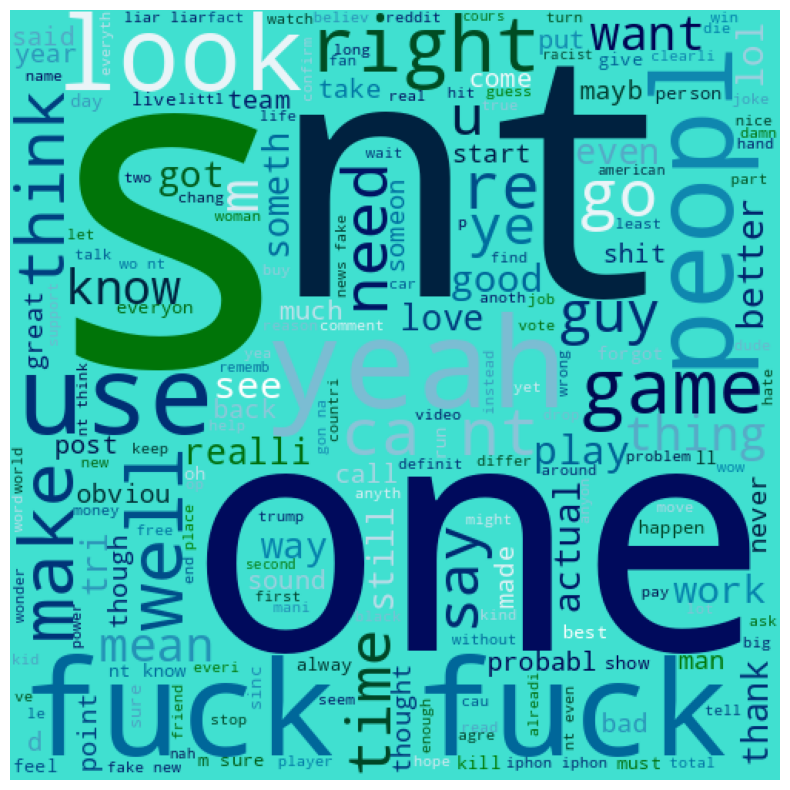

In [27]:
plt.figure(figsize=(10, 10))
wordcloud = wordcloud.WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(temp_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
data["new_comment"]

0                                                      nc nh
1              know west team play west team east team right
2          underdog earlier today sinc gronk s announc af...
3                      meme nt funni none new york nigga one
4                                         could use one tool
                                 ...                        
1010821    m sure iran n korea technolog creat pigbirdhum...
1010822                                 whatev nt vote green
1010823    perhap atheist conspiraci make christian look bad
1010824                         slav got countri call kosovo
1010825                 valu capit good money imprison peopl
Name: new_comment, Length: 1010826, dtype: object

In [29]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

In [ ]:
# tokenized_comments = []
# for comm in data["new_comment"]:
#   tokens = comm.split()
#   for tok in tokens:
#     tokenized_comments.append(tok)

In [ ]:
#making the model on a small subset of data

In [48]:
tok_comments = data["new_comment"][:5000].apply(lambda x: x.split())
id2word = corpora.Dictionary(tok_comments)

In [49]:
corpus = [id2word.doc2bow(txt) for txt in tok_comments]

In [50]:
#model building
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [51]:
pprint(lda.print_topics())

[(0,
  '0.022*"time" + 0.014*"take" + 0.012*"first" + 0.010*"win" + 0.008*"guess" + '
  '0.008*"forgot" + 0.007*"alreadi" + 0.007*"player" + 0.006*"op" + '
  '0.006*"place"'),
 (1,
  '0.041*"would" + 0.017*"sure" + 0.010*"still" + 0.010*"back" + 0.008*"call" '
  '+ 0.005*"level" + 0.005*"figur" + 0.005*"send" + 0.004*"chang" + '
  '0.004*"lost"'),
 (2,
  '0.038*"like" + 0.019*"yeah" + 0.017*"m" + 0.017*"nt" + 0.011*"say" + '
  '0.010*"pretti" + 0.010*"someon" + 0.009*"much" + 0.008*"ve" + 0.007*"also"'),
 (3,
  '0.038*"peopl" + 0.025*"think" + 0.011*"someth" + 0.011*"white" + 0.008*"na" '
  '+ 0.007*"mani" + 0.006*"gon" + 0.004*"cool" + 0.004*"left" + 0.003*"power"'),
 (4,
  '0.012*"talk" + 0.005*"read" + 0.004*"e" + 0.002*"b" + 0.002*"mujer" + '
  '0.002*"una" + 0.002*"pedir" + 0.002*"ver" + 0.002*"mucho" + '
  '0.002*"moderadora"'),
 (5,
  '0.020*"u" + 0.016*"need" + 0.013*"better" + 0.006*"hey" + 0.005*"american" '
  '+ 0.005*"g" + 0.004*"presid" + 0.004*"friend" + 0.003*"import" + 

In [ ]:
#increasing data to include 10000 comments

In [55]:
tok_comments = data["new_comment"][:10000].apply(lambda x: x.split())
id2word = corpora.Dictionary(tok_comments)

In [56]:
corpus = [id2word.doc2bow(txt) for txt in tok_comments]

In [57]:
#model building
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [58]:
pprint(lda.print_topics())

[(0,
  '0.022*"much" + 0.018*"forgot" + 0.011*"take" + 0.008*"suppos" + '
  '0.008*"hate" + 0.007*"part" + 0.005*"phone" + 0.005*"le" + 0.004*"hell" + '
  '0.004*"defens"'),
 (1,
  '0.027*"game" + 0.022*"need" + 0.017*"better" + 0.016*"want" + '
  '0.008*"everyth" + 0.007*"away" + 0.006*"kid" + 0.006*"money" + 0.005*"suck" '
  '+ 0.005*"miss"'),
 (2,
  '0.019*"come" + 0.018*"oh" + 0.018*"man" + 0.011*"love" + 0.010*"back" + '
  '0.009*"support" + 0.006*"babi" + 0.004*"ban" + 0.004*"help" + 0.004*"joe"'),
 (3,
  '0.035*"go" + 0.018*"thought" + 0.016*"clearli" + 0.013*"first" + '
  '0.007*"origin" + 0.005*"ad" + 0.004*"skin" + 0.004*"america" + '
  '0.003*"round" + 0.003*"car"'),
 (4,
  '0.028*"well" + 0.016*"everi" + 0.014*"never" + 0.010*"person" + 0.010*"ve" '
  '+ 0.010*"win" + 0.009*"team" + 0.008*"best" + 0.008*"alway" + 0.008*"sinc"'),
 (5,
  '0.017*"thing" + 0.014*"mayb" + 0.012*"though" + 0.010*"live" + 0.008*"next" '
  '+ 0.008*"matter" + 0.007*"state" + 0.005*"food" + 0.004*"i

In [61]:
print('\nPerplexity : ', lda.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=tok_comments, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -9.464837154424984

Coherence Score:  0.49967596418391463
